# Ансамблевые методы, Кузнецов Борис Сергеевич



Ансамбль - это комбинация нескольких алгоритмов машинного обучения. Такой метод позволяет улучшить положительные качества отдельно взятых алгоритмов, которые сами по себе могут работать слабо, а вот в группе - ансамбле давать хороший результат. При использовании ансамблевых методов, алгоритмы учатся одновременно и могут исправлять ошибки друг друга. Основные примеры:

* Бэггинг
* Бустинг

## Бэггинг
При данном методе базовые алгоритмы являются представителями одного и того же семейства, они **обучаются параллельно и почти независимо друг от друга**, а финальные результаты лишь агрегируются. Нам необходимо, чтобы на вход слабым алгоритмам подавались разные данные, а не один и тот же набор, ведь тогда результат базовых моделей будет идентичен и смысла в них не будет.

Для того, чтобы понять, каким образом исходный датасет делится для формирования входных выборок для слабых алгоритмов, используется понятие бутстрэпа. При использовании бутстрэпа из исходной выборки берется один случайный элемент, записывается в обучающую выборку, затем возвращается обратно. Так делается n раз, где n - желаемый размер обучающей выборки. Существует правило, что в обучающей выборке в итоге будет примерно ⅔*n разных объектов. Таким образом, должны сформироваться m обучающих выборок для m слабых алгоритмов.

Бутстрэп выборки являются в значительной степени независимыми. Отчасти поэтому и говорят, что базовые алгоритмы обучаются на выборках независимо.

Что касается агрегации выходов базовых алгоритмов, то в случае задачи классификации зачастую просто выбирается наиболее часто встречающийся класс, а в случае задачи регрессии выходы алгоритмов усредняются.

**Бэггинг направлен на уменьшение разброса (дисперсии)** в данных, и зачастую данный прием предстает в виде алгоритма случайного леса, где слабые модели - это довольно глубокие случайные деревья. Однако, при построении случайного леса используется еще один прием, такой как метод случайных подпространств. Мало того, что благодаря бутсрэпу выбираются некоторые объекты нашего датасета, так еще и выбирается случайное подмножество признаков. В итоге, наша условная матрица признаков уменьшается как по строкам, так и столбцам. Это помогает действительно снизить корреляцию между слабыми учениками.


## Бустинг
В данном случае, модели уже не обучаются отдельно друг от друга, а **каждая следующая правит ошибки предыдущей**. То есть можно сказать, что если один слабый алгоритм не смог выявить какую-либо закономерность в данных, так как это было для него сложно, то следующая модель должна сделать это. Но из данного подхода вытекает недостаток: **работу алгоритма трудно распараллелить** из-за зависимости предыдущего и последующего шагов.

**Бустинг направлен на уменьшение смещения в данных**. Поэтому в качестве базовых алгоритмов могут браться модели с достаточно высоким смещением, например, неглубокие случайные деревья.

Типичными представителями бустинга являются градиентный бустинг.

Градиентный бустинг использует типичный алгоритм градиентного спуска для решения задачи. Когда приходит время добавить новый слабый алгоритм в ансамбль делается следующее:

Находится оптимальный вектор сдвига, улучшающий предыдущий ансамбль алгоритмов

Этот вектор сдвига является антиградиентом от функции ошибок работы предыдущего ансамбля моделей

Благодаря вектору сдвигов мы знаем, какие значения должны принимать объекты обучающей выборки

А поскольку нам надо найти очередной алгоритм в композиции, то находим тот, при использовании которого минимизируется отклонение ответов от истинных

## Примеры использования данных методов

### Задача на регрессию
Построим модели для прогнозирования цен на недвижимость в Бостоне.
В качестве данных для модели используется датасет с набором данных по цене недвижимости в Бостоне.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import graphviz

boston = load_boston()
df = pd.DataFrame(boston['data'],columns=boston['feature_names'])
df.head(100)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.12204,0.0,2.89,0.0,0.445,6.625,57.8,3.4952,2.0,276.0,18.0,357.98,6.65
96,0.11504,0.0,2.89,0.0,0.445,6.163,69.6,3.4952,2.0,276.0,18.0,391.83,11.34
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57


In [ ]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

In [ ]:
df_unique = {col : df[col].nunique() for col in df.columns}
print(df_unique)

{'CRIM': 504, 'ZN': 26, 'INDUS': 76, 'CHAS': 2, 'NOX': 81, 'RM': 446, 'AGE': 356, 'DIS': 412, 'RAD': 9, 'TAX': 66, 'PTRATIO': 46, 'B': 357, 'LSTAT': 455}


In [ ]:
x= df.iloc[:, [2,3]].values   
y= df.iloc[:, 4].values 

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3,random_state= 0) 

In [ ]:
x, y = make_regression(n_features=4, n_informative=1000,random_state=20, shuffle=False)

Обучаем модель на базе Случайного леса

In [ ]:
regr = RandomForestRegressor(max_depth=3, random_state=1)
regr.fit(x_train, y_train)

y_train_pred = regr.predict(x_train)
y_test_pred = regr.predict(x_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)

pd.DataFrame({'Тестовая часть выборки':[metrics.mean_squared_error(y_test, y_test_pred),metrics.mean_absolute_error(y_test, y_test_pred),metrics.r2_score(y_test, y_test_pred)],
              'Обучающая часть выборки':[metrics.mean_squared_error(y_train, y_train_pred),metrics.mean_absolute_error(y_train, y_train_pred),metrics.r2_score(y_train, y_train_pred)]},
             index=['Средняя квадратичная ошибка','Средняя абсолютная ошибка','Коэффициент детерминации'])

,Тестовая часть выборки,Обучающая часть выборки
Средняя квадратичная ошибка,0.003420,0.003058
Средняя абсолютная ошибка,0.044551,0.042749
Коэффициент детерминации,0.747818,0.770486


In [ ]:
print("Кросс-валидация:", cross_val_score(regr, x, y, cv=5))

Кросс-валидация: [0.91637914 0.80540377 0.92305591 0.90511648 0.8861682 ]


Обучаем модель на базе Градиентного бустинга

In [ ]:
regr = GradientBoostingRegressor(max_depth=3, random_state=1)
regr.fit(x_train, y_train)

y_train_pred = regr.predict(x_train)
y_test_pred = regr.predict(x_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)

pd.DataFrame({'Тестовая часть выборки':[metrics.mean_squared_error(y_test, y_test_pred),metrics.mean_absolute_error(y_test, y_test_pred),metrics.r2_score(y_test, y_test_pred)],
              'Обучающая часть выборки':[metrics.mean_squared_error(y_train, y_train_pred),metrics.mean_absolute_error(y_train, y_train_pred),metrics.r2_score(y_train, y_train_pred)]},
             index=['Средняя квадратичная ошибка','Средняя абсолютная ошибка','Коэффициент детерминации'])




,Тестовая часть выборки,Обучающая часть выборки
Средняя квадратичная ошибка,0.002853,0.002030
Средняя абсолютная ошибка,0.031555,0.026793
Коэффициент детерминации,0.789605,0.847639


In [ ]:
print("Кросс-валидация:", cross_val_score(regr, x, y, cv=5))

Кросс-валидация: [0.96392918 0.90698032 0.97161463 0.9431845  0.95122138]


Как видим, оба метода неплохо сработали.
Случайный лес дал чуть больше ошибок чем Градиентный бустинг. Это из-за особенностей данного метода, уменьшить ошибки можно увеличив максимальную глубину.

### Задача на классификацию

Используя набор данных с информацией о типе стекла и его химическом составе, произведем классификацию типов стекла.

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score, accuracy_score

df = pd.read_csv("glass.csv")
df.head(100)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
95,1.51860,13.36,3.43,1.43,72.26,0.51,8.60,0.00,0.00,2
96,1.51841,13.02,3.62,1.06,72.34,0.64,9.13,0.00,0.15,2
97,1.51743,12.20,3.25,1.16,73.55,0.62,8.90,0.00,0.24,2
98,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.00,0.00,2


In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Проведем небольшое исследование

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Количество типов стекла')

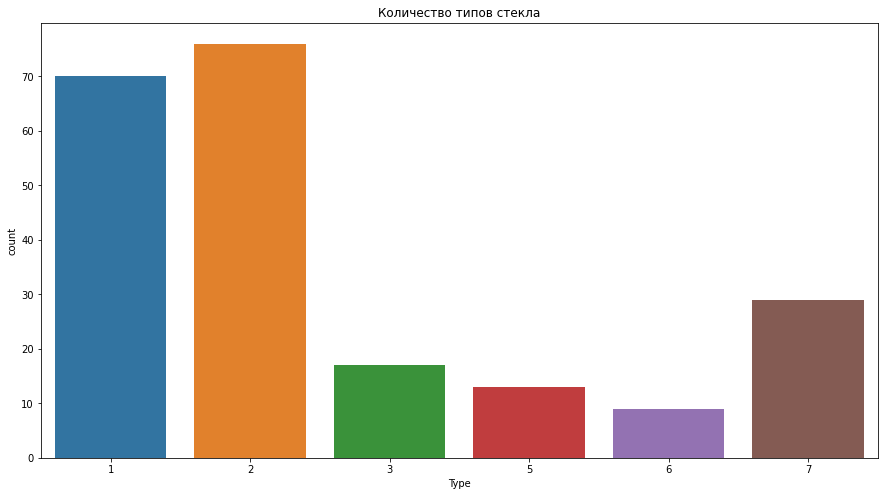

In [ ]:
plt.subplots(figsize = (15,8))
sns.countplot('Type',data=df).set_title('Количество типов стекла')

По этому графику можно заметить, что больше всего стекл первого и второго типа

In [ ]:
df.groupby('Type', as_index=False).mean()

,Type,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000
1,2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
2,3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
3,5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
4,6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
5,7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


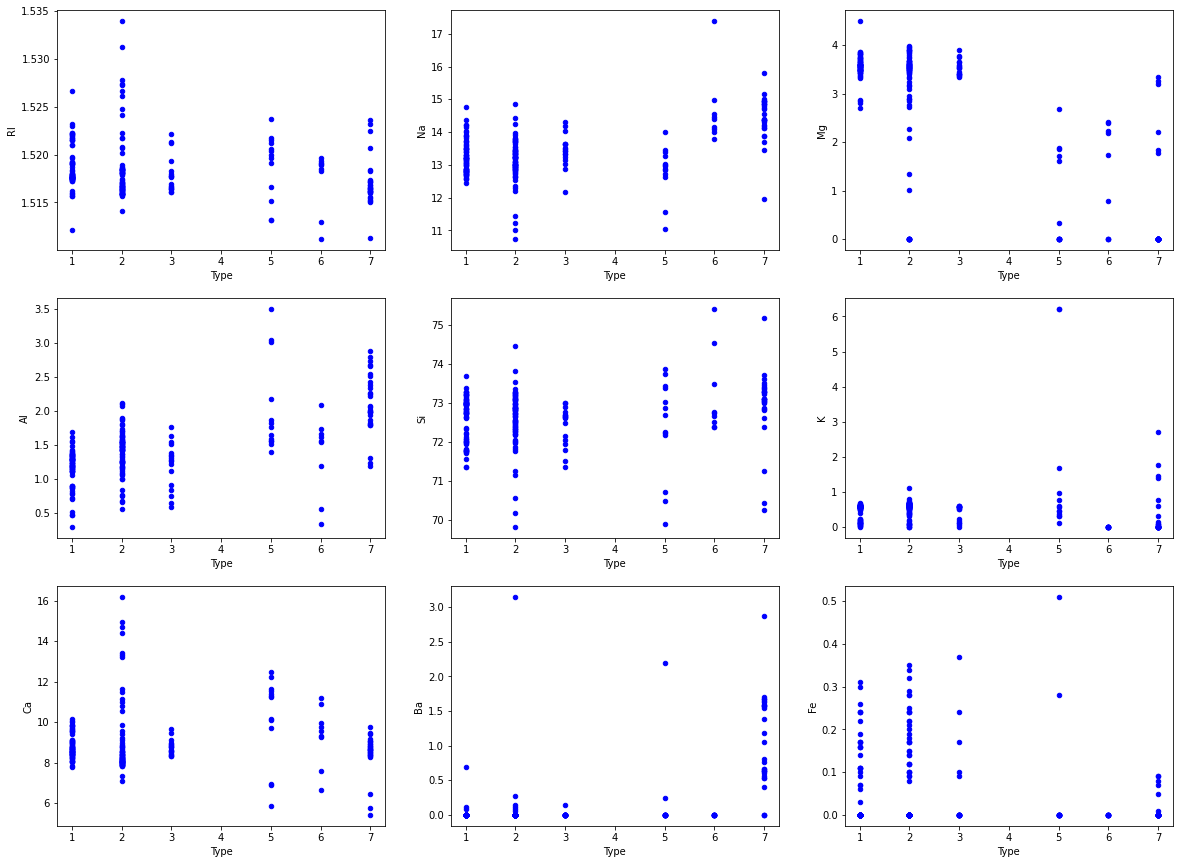

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

for idx, feature in enumerate(df.columns[:-1]):
    df.plot("Type",feature, subplots=True, kind="scatter", color='b', ax=axes[idx // 3, idx % 3])

Исходя из вышепредставленных графиков зависимостей, можно сделать вывод что показатель приломления примерно одинаков для всех стекл, содержание натрия выше в типах 6 и 7, содержание магния выше в 1,2 и 3 типах, содержание алюминия выше в 5 и 7 типах. Содержание силитрума и калия примерно одинаковое во всех типах стекл. Кальция больше всего содержится во 2 и 5 типах стекла. Концентрация бария везде достаточно низкая за исключением 7 типа. Концентрация железа тоже очень низкая, но преобладает в 1,2 и 3 типах стекл.

Далее рассмотрим парные отношения между каждым признаком (заисключением K, Ba, Fe так как они представляют минимальный объем информации).

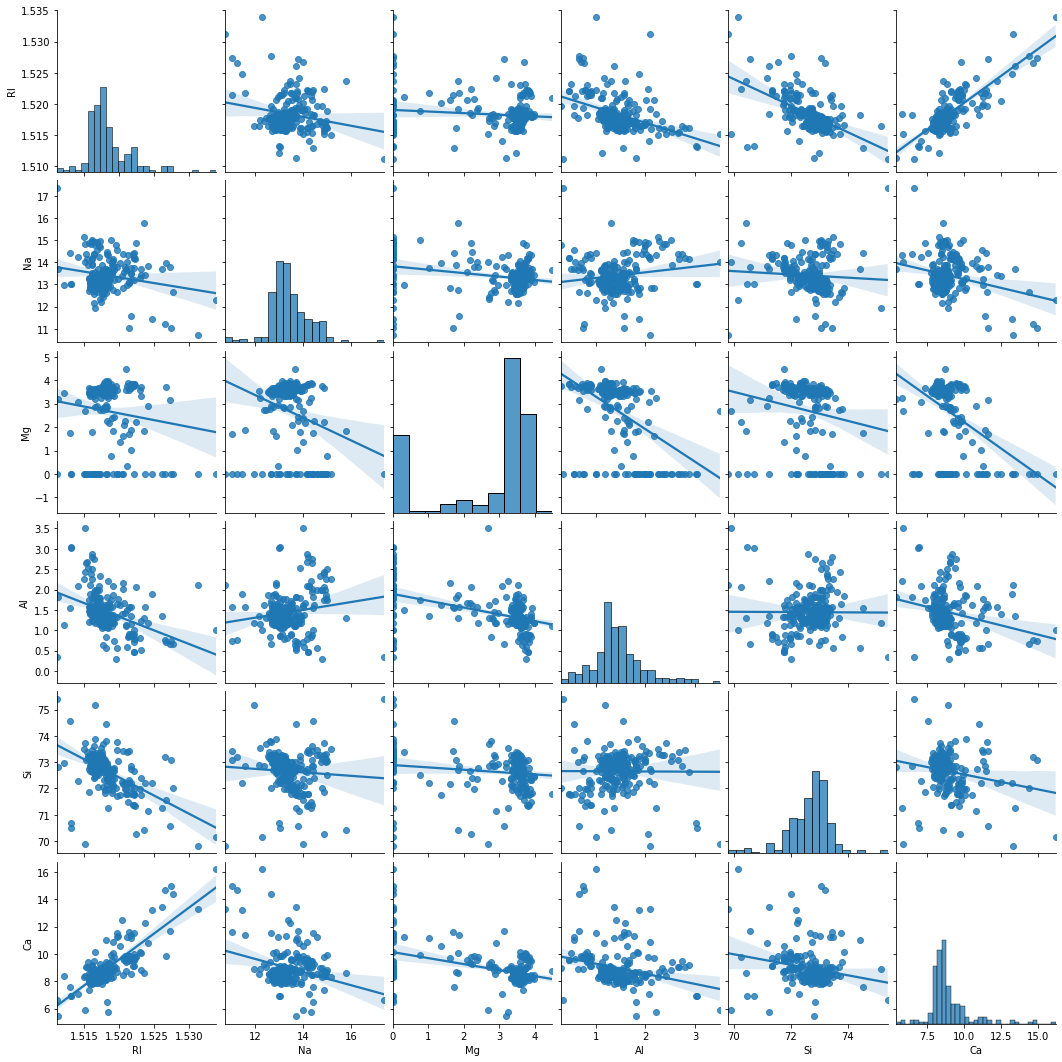

In [ ]:
sns.pairplot(df[['RI','Na','Mg','Al','Si','Ca']], kind='reg')

В большинстве случаев точки разбросаны, но можно увидеть явную корреляцию между RI и Ca и между Si и RI. 

In [ ]:
print("\nПопарные корреляции между признаками:\n")

df[['RI','Na','Mg','Al','Si','Ca','Ba','Fe','Type']].corr()


Попарные корреляции между признаками:



,RI,Na,Mg,Al,Si,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.208732,-0.102151,-0.094201,0.151565
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,0.000952,0.575161,-0.188278,1.000000


Как видно из таблицы, RI и Ca имеют высокую положительную корреляцию, а Si и RI-отрицательную.

Далее рассмотрим какие из компонентов стекла являются основными.

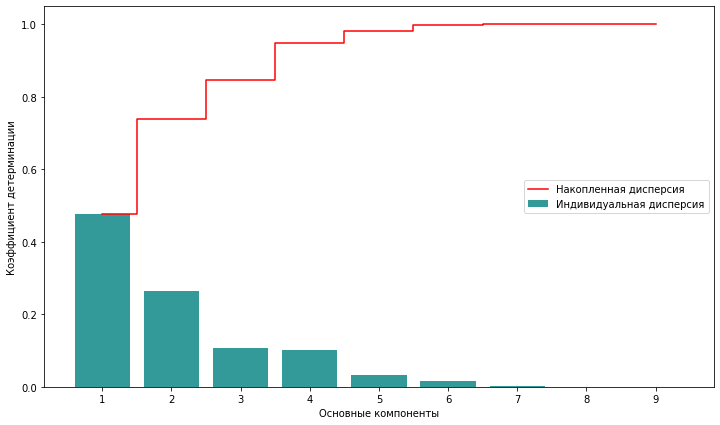

In [ ]:
X_var = df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
pca = PCA(random_state = 1)
pca.fit(X_var)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(12,7))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'Индивидуальная дисперсия', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'Накопленная дисперсия', color='red')
plt.ylabel('Коэффициент детерминации')
plt.xlabel('Основные компоненты')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

Исходя из диаграммы выше можно увидеть что первые пять компонентов составляют наибольшую часть состава. В дальнейшем возьмем для анализа эти 5 компонентов.

In [ ]:
pca_red = PCA(n_components=5)
X_reduced = pca_red.fit_transform(X_var)
X = X_reduced
y = df["Type"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=25)

In [ ]:
clf = RandomForestClassifier(max_depth=3, random_state=1)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
print('Точность: ', accuracy_score(y_test_pred,y_test))

Точность:  0.7692307692307693


In [ ]:
clf = GradientBoostingClassifier(max_depth=3, random_state=1)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
print('Точность: ', accuracy_score(y_test_pred,y_test))

Точность:  0.7538461538461538


Видно, что Случайный лес оказался чуть точнее Градиентного бустинга